# Notes:

# Imports:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

In [2]:
import statsmodels.api as sm

In [3]:
from matplotlib import __version__ as mpl_ver

In [4]:
from ipympl import __version__ as ipy_ver

In [5]:
ipy_ver

'0.9.7'

In [6]:
mpl_ver

'3.10.5'

In [9]:
%matplotlib widget

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the two vectors that span the first plane
v1 = np.array([1, 1, 1])
v2 = np.array([0, 2, -2])

# Define the third vector (point)
v3 = np.array([3, 1, 2])

# Define two more vectors that span a second plane
v4, v5 = v1.copy(), v2.copy()
v4[1] = 0
v5[1] = 0

Vector Information:
v1 (red): [1 1 1]
v2 (blue): [ 0  2 -2]
v3 (dark blue point): [3 1 2]
v4 (orange): [1 0 1]
v5 (green): [ 0  0 -2]

Plane 1 normal: [-0.81649658  0.40824829  0.40824829]

v3 projected onto plane 1: [2.  1.5 2.5]

Residual from plane 1 (purple): [ 1.  -0.5 -0.5]
Residual magnitude: 1.225

Angles between residual and vectors:
Residual ∠ v4: 73.22°
Residual ∠ v5: 65.91°

Verification - Plane 1 orthogonality:
Residual · v1 = 0.000000 (should be ~0)
Residual · v2 = 0.000000 (should be ~0)


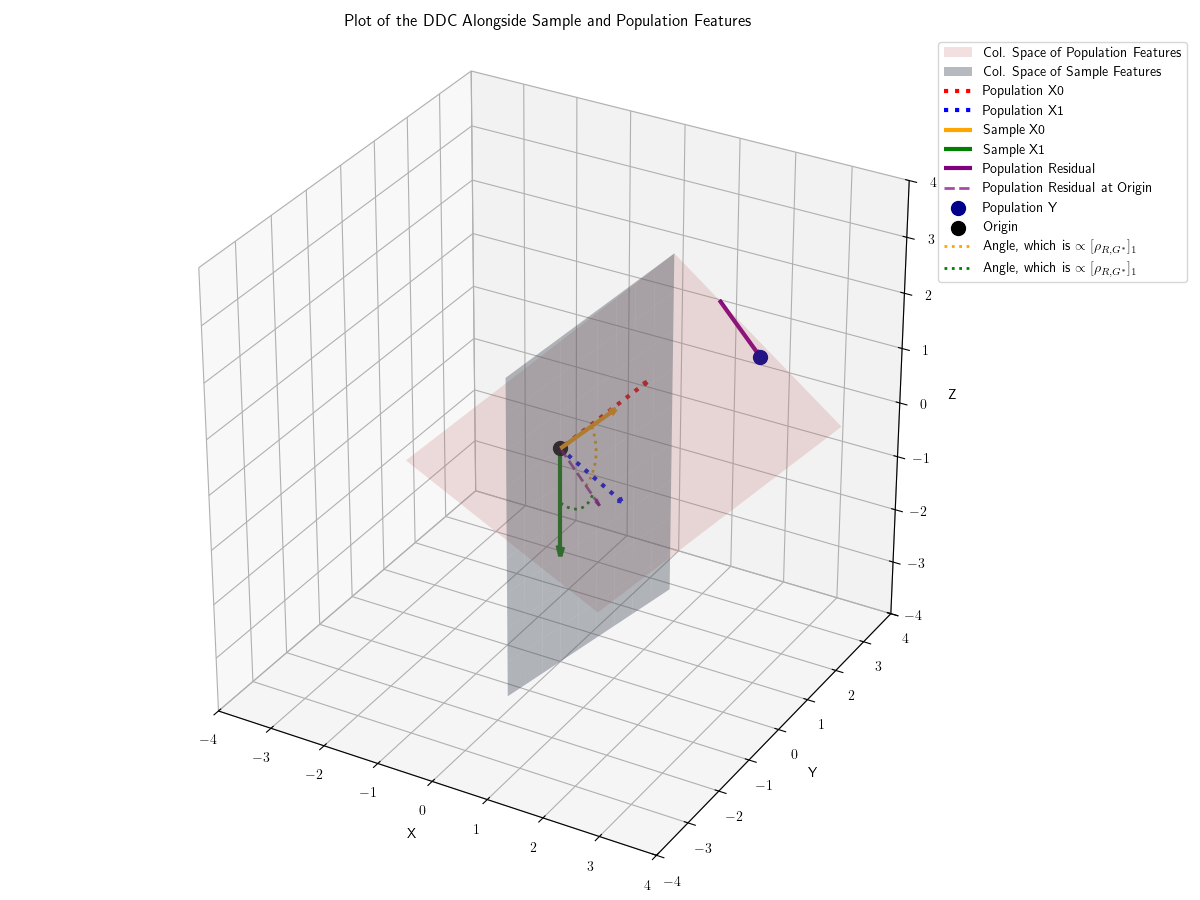

In [30]:
# Calculate the normal vector to the first plane using cross product
normal1 = np.cross(v1, v2)
normal1 = normal1 / np.linalg.norm(normal1)  # normalize

# Project v3 onto the first plane
# The projection formula: proj = v3 - ((v3 · n) * n)
projection_onto_plane1 = v3 - np.dot(v3, normal1) * normal1

# Calculate the orthogonal residual vector from plane 1
residual1 = v3 - projection_onto_plane1

# Function to calculate angle between two vectors in degrees
def angle_between_vectors(u, v):
    cos_angle = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
    # Clamp to avoid numerical errors
    cos_angle = np.clip(cos_angle, -1.0, 1.0)
    return np.degrees(np.arccos(cos_angle))

# Function to draw angle arc between two vectors
def draw_angle_arc(ax, start_point, vec1, vec2, radius=0.5, color='black', label=None, linestyle=':'):
    # Normalize vectors
    v1_norm = vec1 / np.linalg.norm(vec1)
    v2_norm = vec2 / np.linalg.norm(vec2)
    
    # Calculate angle
    angle = np.arccos(np.clip(np.dot(v1_norm, v2_norm), -1.0, 1.0))
    
    # Create arc points
    n_points = 20
    # Create a coordinate system with v1_norm as x-axis
    # Find a vector perpendicular to v1_norm in the plane of v1_norm and v2_norm
    cross = np.cross(v1_norm, v2_norm)
    if np.linalg.norm(cross) < 1e-10:  # vectors are parallel
        return
    
    # Create rotation axis (perpendicular to the plane containing both vectors)
    rotation_axis = cross / np.linalg.norm(cross)
    
    # Generate arc points by rotating v1_norm towards v2_norm
    arc_points = []
    for i in range(n_points + 1):
        theta = angle * i / n_points
        # Rodrigues' rotation formula
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        rotated_vec = (v1_norm * cos_theta + 
                      np.cross(rotation_axis, v1_norm) * sin_theta + 
                      rotation_axis * np.dot(rotation_axis, v1_norm) * (1 - cos_theta))
        arc_points.append(start_point + radius * rotated_vec)
    
    arc_points = np.array(arc_points)
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], 
            color=color, linewidth=2, linestyle=linestyle, label=label)
    
    return arc_points

# Calculate angles between residual vector and the second plane vectors
angle_residual1_v4 = angle_between_vectors(residual1, v4)
angle_residual1_v5 = angle_between_vectors(residual1, v5)
# Calculate angle between residual and v3 - removed

# Create grids for both planes visualization
# First plane: linear combination of v1 and v2
u1 = np.linspace(-1, 2, 10)
v1_grid = np.linspace(-1, 2, 10)
U1, V1_grid = np.meshgrid(u1, v1_grid)

X1 = U1 * v1[0] + V1_grid * v2[0]
Y1 = U1 * v1[1] + V1_grid * v2[1]
Z1 = U1 * v1[2] + V1_grid * v2[2]

# Second plane: linear combination of v4 and v5
u2 = np.linspace(-1, 2, 10)
v2_grid = np.linspace(-1, 2, 10)
U2, V2_grid = np.meshgrid(u2, v2_grid)

X2 = U2 * v4[0] + V2_grid * v5[0]
Y2 = U2 * v4[1] + V2_grid * v5[1]
Z2 = U2 * v4[2] + V2_grid * v5[2]

# Create the 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot both planes with more distinctive colors
ax.plot_surface(X1, Y1, Z1, alpha=0.2, color='lightcoral', label='Col. Space of Population Features')
ax.plot_surface(X2, Y2, Z2, alpha=0.4, color='lightsteelblue', label='Col. Space of Sample Features')

# Plot the spanning vectors for both planes
origin = np.array([0, 0, 0])
# v1 and v2 with dotted style to distinguish from v4, v5
ax.quiver(origin[0], origin[1], origin[2], v1[0], v1[1], v1[2], 
          color='red', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='Population X0')
ax.quiver(origin[0], origin[1], origin[2], v2[0], v2[1], v2[2], 
          color='blue', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='Population X1')
# v4 and v5 with solid style
ax.quiver(origin[0], origin[1], origin[2], v4[0], v4[1], v4[2], 
          color='orange', arrow_length_ratio=0.1, linewidth=3, label='Sample X0')
ax.quiver(origin[0], origin[1], origin[2], v5[0], v5[1], v5[2], 
          color='green', arrow_length_ratio=0.1, linewidth=3, label='Sample X1')

# Plot the third vector (point) - removed, will only show as dot below

# Plot the projection of v3 onto the plane - removed, will only show as dot below

# Plot the orthogonal residual vector from plane 1
ax.quiver(projection_onto_plane1[0], projection_onto_plane1[1], projection_onto_plane1[2],
          residual1[0], residual1[1], residual1[2], 
          color='purple', arrow_length_ratio=0.1, linewidth=3, label='Population Residual')

# Plot the residual vector again at the origin for angle visualization
ax.quiver(origin[0], origin[1], origin[2], residual1[0], residual1[1], residual1[2], 
          color='purple', arrow_length_ratio=0.1, linewidth=2, linestyle='--', 
          alpha=0.7, label='Population Residual at Origin')

# Mark important points
ax.scatter(*v3, color='darkblue', s=100, label='Population Y')
ax.scatter(*origin, color='black', s=100, label='Origin')

# Add connection line from projection to point
ax.plot([projection_onto_plane1[0], v3[0]], 
        [projection_onto_plane1[1], v3[1]], 
        [projection_onto_plane1[2], v3[2]], 
        'purple', linewidth=2, linestyle=':')

# Draw angle arcs from the origin
# Angle between residual and v4 (both from origin) - use same color as v4
draw_angle_arc(ax, origin, residual1, v4, 
               radius=0.8, color='orange', label=r"Angle, which is $\propto [\rho_{R, G^*}]_1$")

# Angle between residual and v5 (both from origin) - use same color as v5
draw_angle_arc(ax, origin, residual1, v5, 
               radius=1.0, color='green', label=r"Angle, which is $\propto [\rho_{R, G^*}]_1$")

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Plot of the DDC Alongside Sample and Population Features')

# Set axis limits to tighter bounds
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

# Add legend
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left')

# Set equal aspect ratio for better visualization
ax.set_box_aspect([1,1,1])

# Print comprehensive information
print("Vector Information:")
print(f"v1 (red): {v1}")
print(f"v2 (blue): {v2}")
print(f"v3 (dark blue point): {v3}")
print(f"v4 (orange): {v4}")
print(f"v5 (green): {v5}")
print(f"\nPlane 1 normal: {normal1}")
print(f"\nv3 projected onto plane 1: {projection_onto_plane1}")
print(f"\nResidual from plane 1 (purple): {residual1}")
print(f"Residual magnitude: {np.linalg.norm(residual1):.3f}")

print(f"\nAngles between residual and vectors:")
print(f"Residual ∠ v4: {angle_residual1_v4:.2f}°")
print(f"Residual ∠ v5: {angle_residual1_v5:.2f}°")

# Verify orthogonality for plane 1
print(f"\nVerification - Plane 1 orthogonality:")
print(f"Residual · v1 = {np.dot(residual1, v1):.6f} (should be ~0)")
print(f"Residual · v2 = {np.dot(residual1, v2):.6f} (should be ~0)")

plt.tight_layout()
plt.show()

In [41]:
plt.close('all')

Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

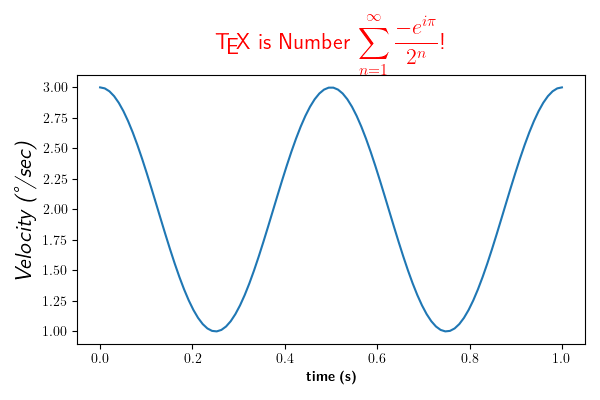

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')

Vector Information:
v1 (red): [1 1 0]
v2 (blue): [1 2 1]
v3 (dark blue point): [3 1 2]
v4 (orange): [1 0 0]
v5 (green): [1 0 1]

Plane 1 normal: [ 0.57735027 -0.57735027  0.57735027]

v3 projected onto plane 1: [1.66666667 2.33333333 0.66666667]

Residual from plane 1 (purple): [ 1.33333333 -1.33333333  1.33333333]
Residual magnitude: 2.309

Angles between residual and vectors:
Residual ∠ v4: 54.74°
Residual ∠ v5: 35.26°

Verification - Plane 1 orthogonality:
Residual · v1 = 0.000000 (should be ~0)
Residual · v2 = 0.000000 (should be ~0)


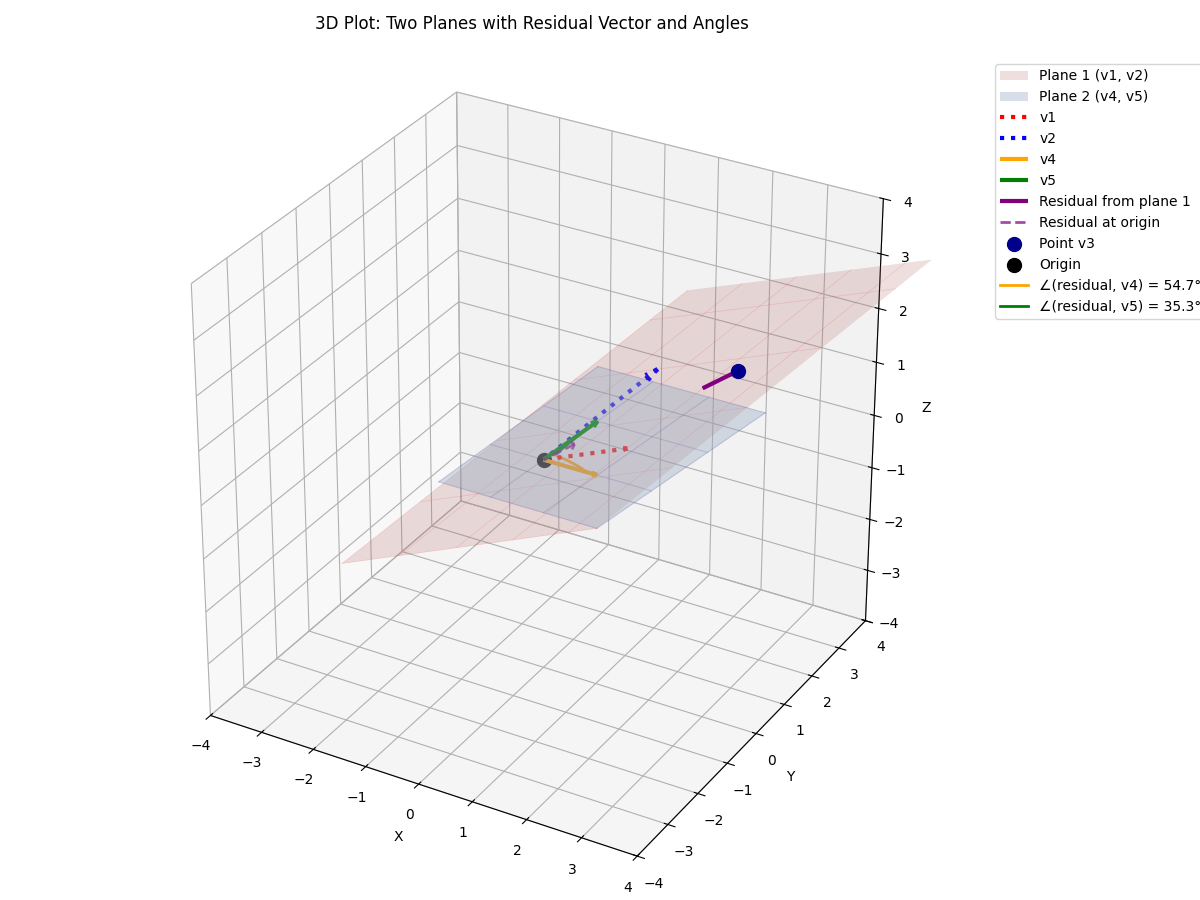

In [55]:
# Calculate the normal vector to the first plane using cross product
normal1 = np.cross(v1, v2)
normal1 = normal1 / np.linalg.norm(normal1)  # normalize

# Project v3 onto the first plane
# The projection formula: proj = v3 - ((v3 · n) * n)
projection_onto_plane1 = v3 - np.dot(v3, normal1) * normal1

# Calculate the orthogonal residual vector from plane 1
residual1 = v3 - projection_onto_plane1

# Function to calculate angle between two vectors in degrees
def angle_between_vectors(u, v):
    cos_angle = np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))
    # Clamp to avoid numerical errors
    cos_angle = np.clip(cos_angle, -1.0, 1.0)
    return np.degrees(np.arccos(cos_angle))

# Function to draw angle arc between two vectors
def draw_angle_arc(ax, start_point, vec1, vec2, radius=0.5, color='black', label=None):
    # Normalize vectors
    v1_norm = vec1 / np.linalg.norm(vec1)
    v2_norm = vec2 / np.linalg.norm(vec2)
    
    # Calculate angle
    angle = np.arccos(np.clip(np.dot(v1_norm, v2_norm), -1.0, 1.0))
    
    # Create arc points
    n_points = 20
    # Create a coordinate system with v1_norm as x-axis
    # Find a vector perpendicular to v1_norm in the plane of v1_norm and v2_norm
    cross = np.cross(v1_norm, v2_norm)
    if np.linalg.norm(cross) < 1e-10:  # vectors are parallel
        return
    
    # Create rotation axis (perpendicular to the plane containing both vectors)
    rotation_axis = cross / np.linalg.norm(cross)
    
    # Generate arc points by rotating v1_norm towards v2_norm
    arc_points = []
    for i in range(n_points + 1):
        theta = angle * i / n_points
        # Rodrigues' rotation formula
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        rotated_vec = (v1_norm * cos_theta + 
                      np.cross(rotation_axis, v1_norm) * sin_theta + 
                      rotation_axis * np.dot(rotation_axis, v1_norm) * (1 - cos_theta))
        arc_points.append(start_point + radius * rotated_vec)
    
    arc_points = np.array(arc_points)
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], 
            color=color, linewidth=2, label=label)
    
    return arc_points

# Calculate angles between residual vector and the second plane vectors
angle_residual1_v4 = angle_between_vectors(residual1, v4)
angle_residual1_v5 = angle_between_vectors(residual1, v5)
# Calculate angle between residual and v3 - removed

# Create grids for both planes visualization
# First plane: linear combination of v1 and v2
u1 = np.linspace(-1, 2, 10)
v1_grid = np.linspace(-1, 2, 10)
U1, V1_grid = np.meshgrid(u1, v1_grid)

X1 = U1 * v1[0] + V1_grid * v2[0]
Y1 = U1 * v1[1] + V1_grid * v2[1]
Z1 = U1 * v1[2] + V1_grid * v2[2]

# Second plane: linear combination of v4 and v5
u2 = np.linspace(-1, 2, 10)
v2_grid = np.linspace(-1, 2, 10)
U2, V2_grid = np.meshgrid(u2, v2_grid)

X2 = U2 * v4[0] + V2_grid * v5[0]
Y2 = U2 * v4[1] + V2_grid * v5[1]
Z2 = U2 * v4[2] + V2_grid * v5[2]

# Create the 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot both planes with more distinctive colors and textures
# Plane 1 with hatching effect using multiple transparent layers
ax.plot_surface(X1, Y1, Z1, alpha=0.2, color='lightcoral', label='Plane 1 (v1, v2)')
# Add subtle grid lines for texture on plane 1
for i in range(0, len(X1), 2):
    ax.plot(X1[i, :], Y1[i, :], Z1[i, :], color='red', alpha=0.15, linewidth=0.5)
for j in range(0, len(X1[0]), 2):
    ax.plot(X1[:, j], Y1[:, j], Z1[:, j], color='red', alpha=0.15, linewidth=0.5)

# Plane 2 with diagonal pattern
ax.plot_surface(X2, Y2, Z2, alpha=0.4, color='lightsteelblue', label='Plane 2 (v4, v5)')
# Add diagonal lines for texture on plane 2
for i in range(0, len(X2), 3):
    ax.plot(X2[i, :], Y2[i, :], Z2[i, :], color='darkblue', alpha=0.2, linewidth=0.8)
for j in range(0, len(X2[0]), 3):
    ax.plot(X2[:, j], Y2[:, j], Z2[:, j], color='darkblue', alpha=0.2, linewidth=0.8)

# Plot the spanning vectors for both planes
origin = np.array([0, 0, 0])
# v1 and v2 with dotted style to distinguish from v4, v5
ax.quiver(origin[0], origin[1], origin[2], v1[0], v1[1], v1[2], 
          color='red', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='v1')
ax.quiver(origin[0], origin[1], origin[2], v2[0], v2[1], v2[2], 
          color='blue', arrow_length_ratio=0.1, linewidth=3, linestyle=':', label='v2')
# v4 and v5 with solid style
ax.quiver(origin[0], origin[1], origin[2], v4[0], v4[1], v4[2], 
          color='orange', arrow_length_ratio=0.1, linewidth=3, label='v4')
ax.quiver(origin[0], origin[1], origin[2], v5[0], v5[1], v5[2], 
          color='green', arrow_length_ratio=0.1, linewidth=3, label='v5')

# Plot the third vector (point) - removed, will only show as dot below

# Plot the projection of v3 onto the plane - removed, will only show as dot below

# Plot the orthogonal residual vector from plane 1
ax.quiver(projection_onto_plane1[0], projection_onto_plane1[1], projection_onto_plane1[2],
          residual1[0], residual1[1], residual1[2], 
          color='purple', arrow_length_ratio=0.1, linewidth=3, label='Residual from plane 1')

# Plot the residual vector again at the origin for angle visualization
ax.quiver(origin[0], origin[1], origin[2], residual1[0], residual1[1], residual1[2], 
          color='purple', arrow_length_ratio=0.1, linewidth=2, linestyle='--', 
          alpha=0.7, label='Residual at origin')

# Mark important points
ax.scatter(*v3, color='darkblue', s=100, label='Point v3')
ax.scatter(*origin, color='black', s=100, label='Origin')

# Add connection line from projection to point
ax.plot([projection_onto_plane1[0], v3[0]], 
        [projection_onto_plane1[1], v3[1]], 
        [projection_onto_plane1[2], v3[2]], 
        'purple', linewidth=2, linestyle=':')

# Draw angle arcs from the origin
# Angle between residual and v4 (both from origin) - use same color as v4
draw_angle_arc(ax, origin, residual1, v4, 
               radius=0.8, color='orange', label=f'∠(residual, v4) = {angle_residual1_v4:.1f}°')

# Angle between residual and v5 (both from origin) - use same color as v5
draw_angle_arc(ax, origin, residual1, v5, 
               radius=1.0, color='green', label=f'∠(residual, v5) = {angle_residual1_v5:.1f}°')

# Set labels and title with proper positioning
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot: Two Planes with Residual Vector and Angles', pad=20)

# Set axis limits to tighter bounds
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Set equal aspect ratio for better visualization
ax.set_box_aspect([1,1,1])

# Print comprehensive information
print("Vector Information:")
print(f"v1 (red): {v1}")
print(f"v2 (blue): {v2}")
print(f"v3 (dark blue point): {v3}")
print(f"v4 (orange): {v4}")
print(f"v5 (green): {v5}")
print(f"\nPlane 1 normal: {normal1}")
print(f"\nv3 projected onto plane 1: {projection_onto_plane1}")
print(f"\nResidual from plane 1 (purple): {residual1}")
print(f"Residual magnitude: {np.linalg.norm(residual1):.3f}")

print(f"\nAngles between residual and vectors:")
print(f"Residual ∠ v4: {angle_residual1_v4:.2f}°")
print(f"Residual ∠ v5: {angle_residual1_v5:.2f}°")

# Verify orthogonality for plane 1
print(f"\nVerification - Plane 1 orthogonality:")
print(f"Residual · v1 = {np.dot(residual1, v1):.6f} (should be ~0)")
print(f"Residual · v2 = {np.dot(residual1, v2):.6f} (should be ~0)")

plt.tight_layout()
plt.show()